In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings(action='ignore')

In [3]:
os.getcwd()

'c:\\Users\\MK PERUMALLA\\OneDrive\\Desktop\\Mision 2026\\DS_Stack\\Data_Visualization'

In [4]:
try:
    data=pd.read_csv("C:/Users/MK PERUMALLA/OneDrive/Desktop/Mision 2026/DS_Stack/Data/udemy_courses.csv")
except ValueError:
    data=pd.read_excel("C:/Users/MK PERUMALLA/OneDrive/Desktop/Mision 2026/DS_Stack/Data/udemy_courses.csv")
finally:
    print('Data loaded into container named data sucessfully')

Data loaded into container named data sucessfully


###### Always work with copied Data Frame

In [5]:
df=data.copy()

In [6]:
df.shape

(3678, 12)

In [7]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [8]:
print("All columns : ",list(df.columns))
print("Category colums : ",list(df.select_dtypes(include='object').columns))
print("Numerical colums : ",list(df.select_dtypes(exclude='object').columns))

All columns :  ['course_id', 'course_title', 'url', 'is_paid', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level', 'content_duration', 'published_timestamp', 'subject']
Category colums :  ['course_title', 'url', 'level', 'published_timestamp', 'subject']
Numerical colums :  ['course_id', 'is_paid', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']


In [9]:
df['published_timestamp']=pd.to_datetime(df['published_timestamp'],format="%Y-%m-%d")

In [10]:
df['is_paid']=df['is_paid'].map({True:'Paid',False:'Free'})

### Data Visualization

In [11]:
# empty figure with no axis
fig=plt.figure()

<Figure size 640x480 with 0 Axes>

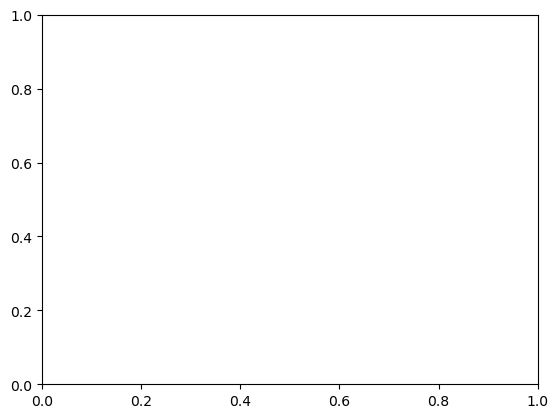

In [12]:
# figure with single axes
fig,ax=plt.subplots()

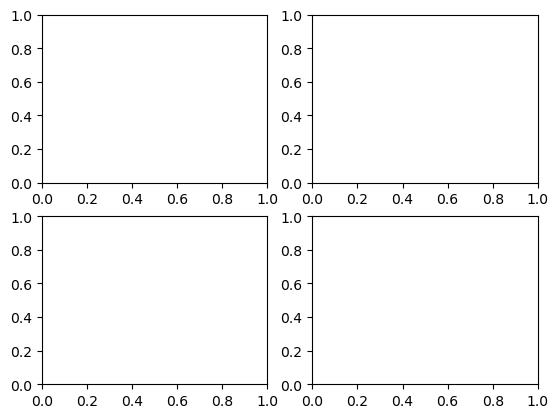

In [13]:
# empty figure with 2x2 grid of axes
fig,ax=plt.subplots(2,2)
plt.show()

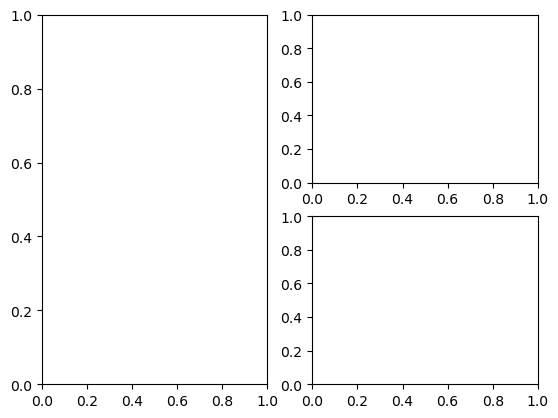

In [14]:
# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])


In [15]:
df['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

### Count Plot of subject

In [16]:
def count_plot(df,col,hue):
    plt.figure(figsize=(8,6))
    fig,axs=plt.subplots()
    sns.countplot(data=df,x=col,orient='h',order=list(df[col].value_counts().index),hue=hue)
    axs.set_title("{col} vs {hue}")
    axs.set_xlabel(col)
    axs.set_ylabel("Total Count")
    axs.legend()
    plt.tight_layout()

<Figure size 800x600 with 0 Axes>

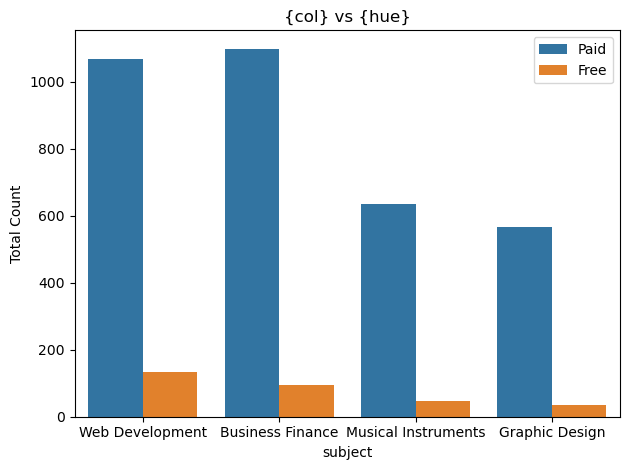

<Figure size 800x600 with 0 Axes>

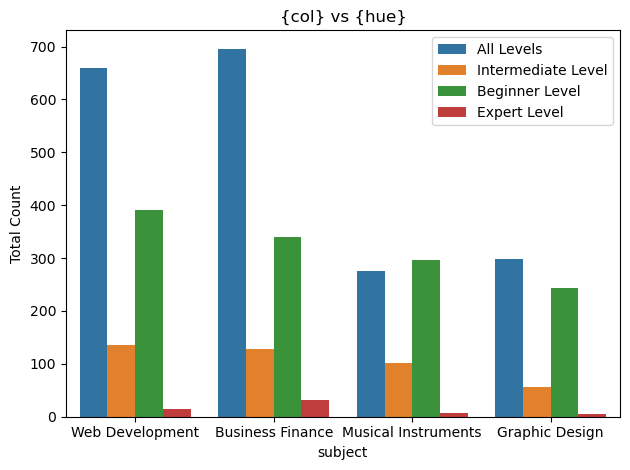

In [17]:
count_plot(df=df,col='subject',hue='is_paid')
count_plot(df=df,col='subject',hue='level')

Text(0, 0.5, 'No. of students subscribed')

<Figure size 1000x600 with 0 Axes>

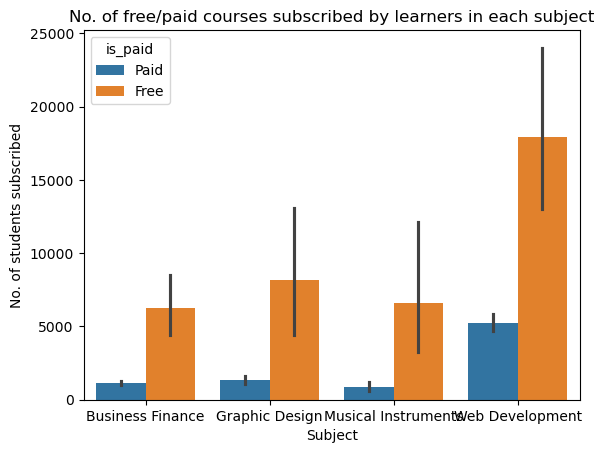

In [18]:
plt.figure(figsize=(10,6))
fig,axs=plt.subplots()
sns.barplot(data=df,x='subject',y='num_subscribers',orient='v',hue='is_paid')
axs.set_title('No. of free/paid courses subscribed by learners in each subject')
axs.set_xlabel('Subject')
axs.set_ylabel('No. of students subscribed')


In [19]:
#data of Highest Paid courses
df[df['price']==df['price'].max()]['course_title'].head(10)

0                    Ultimate Investment Banking Course
4          How To Maximize Your Profits Trading Options
9     The Only Investment Strategy You Need For Your...
10    Forex Trading Secrets of the Pros With Amazon'...
11                      Trading Options With Money Flow
14     Python Algo Trading: Sentiment Trading with News
17    The Complete Chart Pattern Trading Course: A P...
20    Winning Forex Trading with Live Forex Trading ...
21    Forex Traders - Create Your First Trading Robo...
26    Investing 101: The Complete Online Investing C...
Name: course_title, dtype: object

In [20]:
# data of most trending courses according to num_subscribers enrolled for a course and their price
df.sort_values(by='num_subscribers',ascending=False)[['course_title','price']].head(10).reset_index(drop=True)


,course_title,price
0,Learn HTML5 Programming From Scratch,0
1,Coding for Entrepreneurs Basic,0
2,The Web Developer Bootcamp,200
3,Build Your First Website in 1 Week with HTML5 ...,0
4,The Complete Web Developer Course 2.0,200
5,Free Beginner Electric Guitar Lessons,0
6,Web Design for Web Developers: Build Beautiful...,0
7,Learn Javascript & JQuery From Scratch,30
8,Practical PHP: Master the Basics and Code Dyna...,0
9,JavaScript: Understanding the Weird Parts,175


In [21]:
# data of Highly rated courses
df.sort_values(by='num_reviews',ascending=False)[['course_title','price']].head(10).reset_index(drop=True)

,course_title,price
0,The Web Developer Bootcamp,200
1,The Complete Web Developer Course 2.0,200
2,Angular 4 (formerly Angular 2) - The Complete ...,190
3,JavaScript: Understanding the Weird Parts,175
4,Modern React with Redux,180
5,Learn and Understand AngularJS,175
6,Learn and Understand NodeJS,195
7,Learn HTML5 Programming From Scratch,0
8,Angular 2 with TypeScript for Beginners: The P...,150
9,Pianoforall - Incredible New Way To Learn Pian...,200


In [22]:
#data of most lenghthiest courses
df.sort_values(by='num_lectures',ascending=False)[['course_title','price','content_duration']].head(10)

,course_title,price,content_duration
2707,Back to School Web Development and Programming...,200,44.5
160,Learn to Trade The News,200,46.5
2748,"Thoughtful Web Development Course: HTML, Vue.j...",200,25.0
561,Financial Management - A Complete Study,190,71.5
3004,Code & Grow Rich: Earn More As An Entrepreneu...,200,57.0
114,Advanced Accounting A Complete Study for CA / ...,150,62.0
655,MCA Accountancy and Financial Management -Pape...,180,43.5
3501,Learn to build 20 websites and build 14 iOS9 a...,40,22.5
2613,Become a Professional Web Developer | Version 3.0,200,60.0
870,Cost Accounting and Financial Management - A C...,150,45.0


In [23]:
#data of latest courses according to date of publish
df.sort_values(by='published_timestamp',ascending=False)[['course_title','price']].head(10).reset_index(drop=True)

,course_title,price
0,Cryptocurrency (BTC & ETH) Investment & Tradin...,20
1,Forex how traders beat the markest with little...,100
2,Condor Broken Wing Butterfly Options Trading C...,0
3,ABRSM Grade III Piano Class - Handel Sonatina ...,20
4,Angular 4 Front To Back,40
5,Photoshop isn't like what you imagine A to Z .,35
6,Practical Film Financing: Finding & Pitching I...,100
7,Bitcoin & Ethereum Course (2 Course Bundle),200
8,4 Week Rhythm Mastery,20
9,Options Trading Foundation: Your journey to co...,95


### Pie Charts

([<matplotlib.patches.Wedge at 0x2335690f700>,
 [Text(0.6229295266376205, 1.0256504301383735, 'Web Development'),
  Text(-1.0972367856794847, 0.07791942088948664, 'Business Finance'),
  Text(-0.0441482570173117, -1.0991137026724458, 'Musical Instruments'),
  Text(0.9572909145680326, -0.5418432475222884, 'Graphic Design')],
 [Text(0.36337555720527853, 0.5982960842473845, '32.6%'),
  Text(-0.5984927921888097, 0.042501502303356344, '32.5%'),
  Text(-0.024080867463988194, -0.5995165650940613, '18.5%'),
  Text(0.5221586806734723, -0.29555086228488453, '16.4%')])

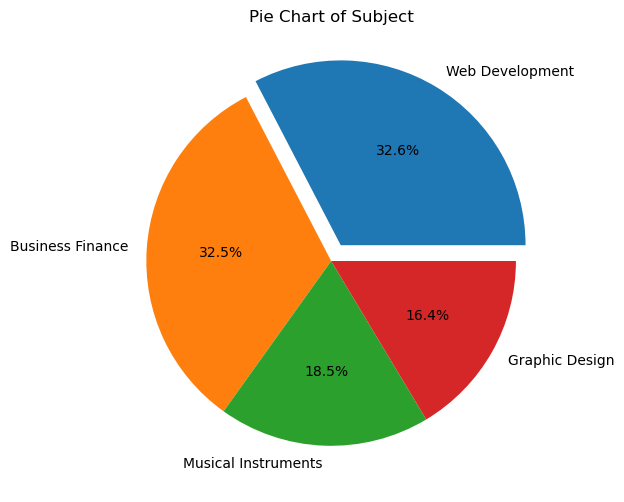

In [24]:
fig,ax=plt.subplots(figsize=(6,6))
ax.set_title("Pie Chart of {a}".format(a='Subject'))
plt.pie(labels=list(df['subject'].value_counts().index),
        x=list(df['subject'].value_counts().values),
        autopct="%1.1f%%",
        explode=[0.1,0,0,0])

### Visualizing Numerical Features

### Boxplots for outlier detection

In [25]:
list(df.select_dtypes(include=['int64','float64']).columns)

['course_id',
 'price',
 'num_subscribers',
 'num_reviews',
 'num_lectures',
 'content_duration']

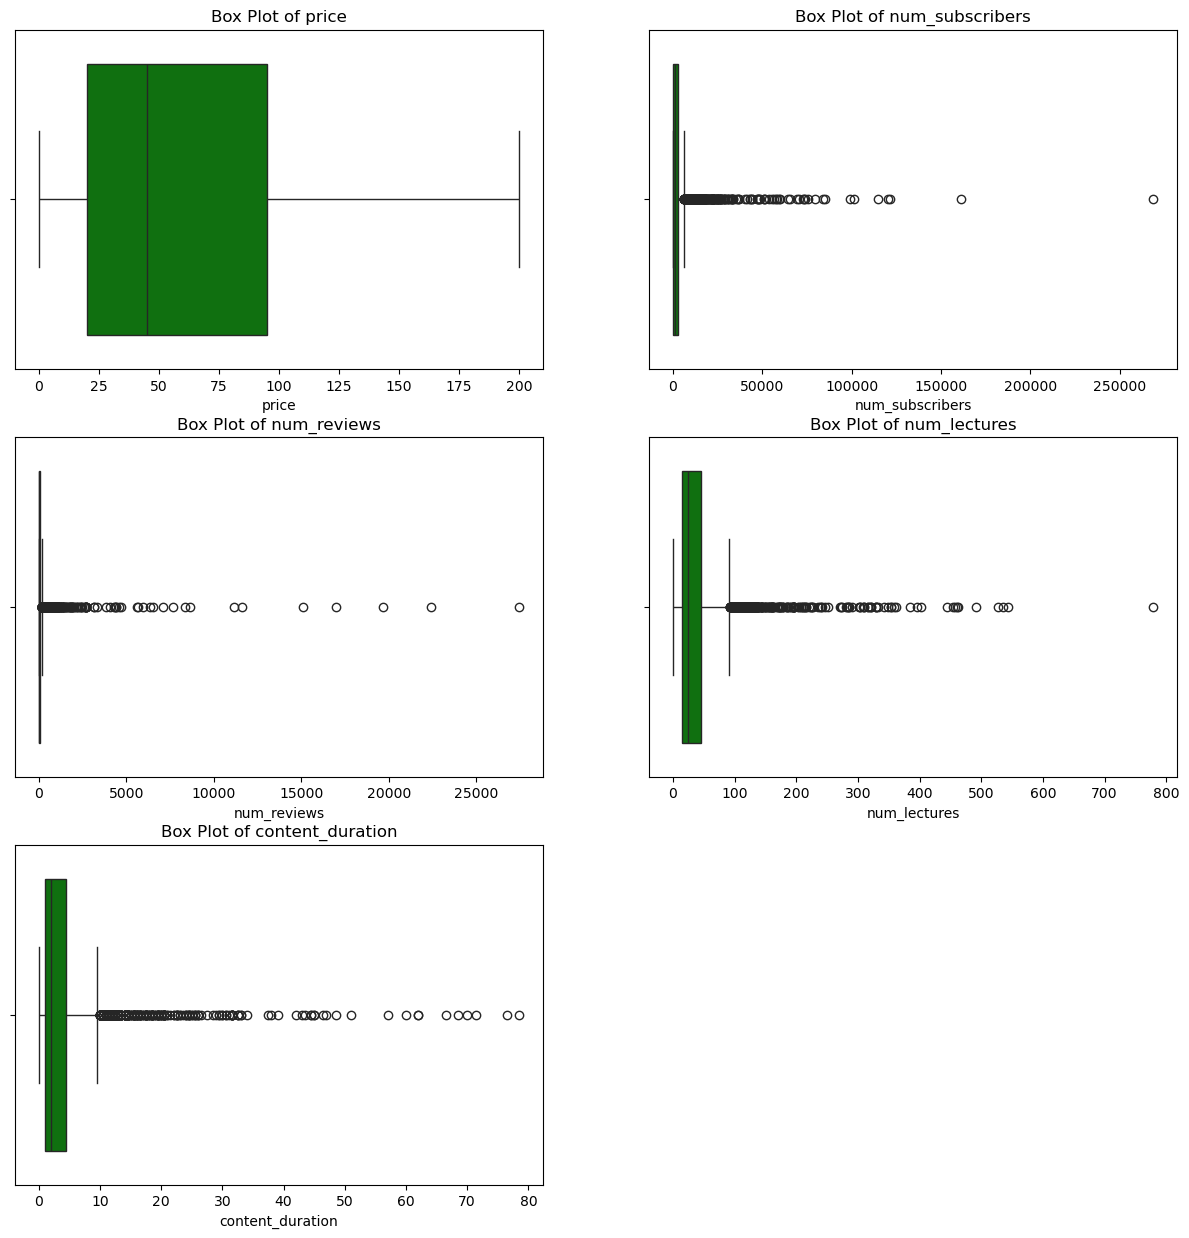

In [26]:
plt.figure(figsize=(15,15))
for i,c in enumerate(list(df.select_dtypes(include=['int64','float64']).columns[1:])):
    plt.subplot(3,2,i+1)
    plt.title("Box Plot of {a}".format(a=c))
    sns.boxplot(x=c,data=df,color='g')
    
    

Here Except Price every column has outliers

### Distribution Plots

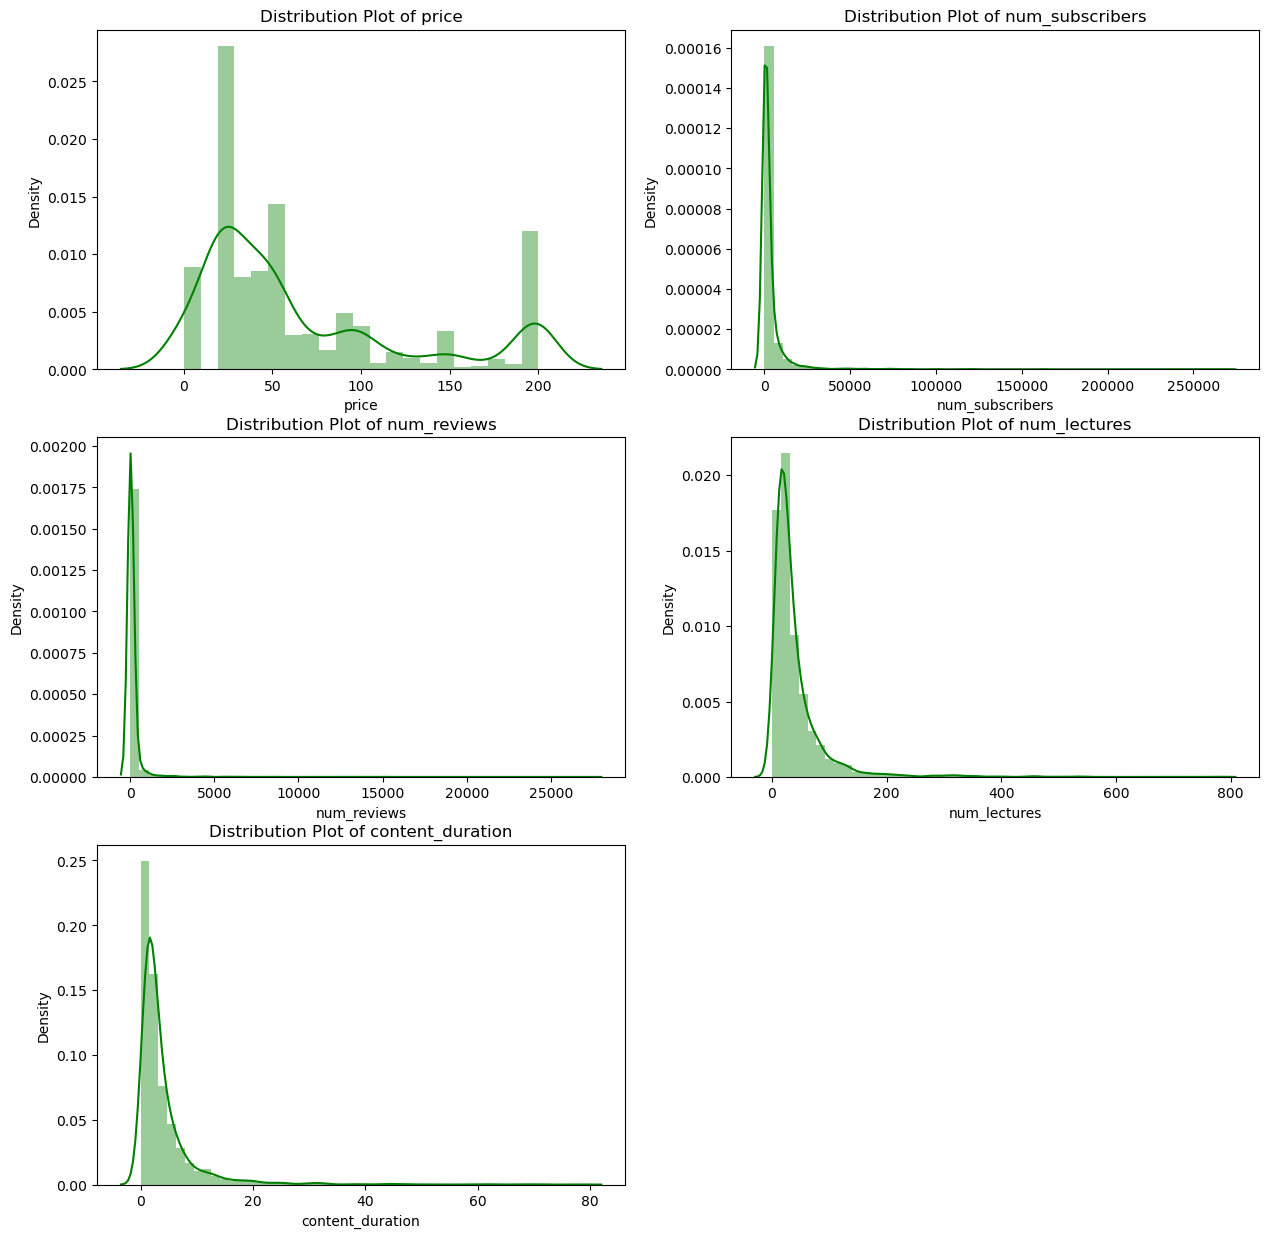

In [27]:
plt.figure(figsize=(15,15))
for i,c in enumerate(list(df.select_dtypes(include=['int64','float64']).columns[1:])):
    plt.subplot(3,2,i+1)
    sns.distplot(df[c],color='g')
    plt.title("Distribution Plot of {a}".format(a=c))

### Scatter Plots 

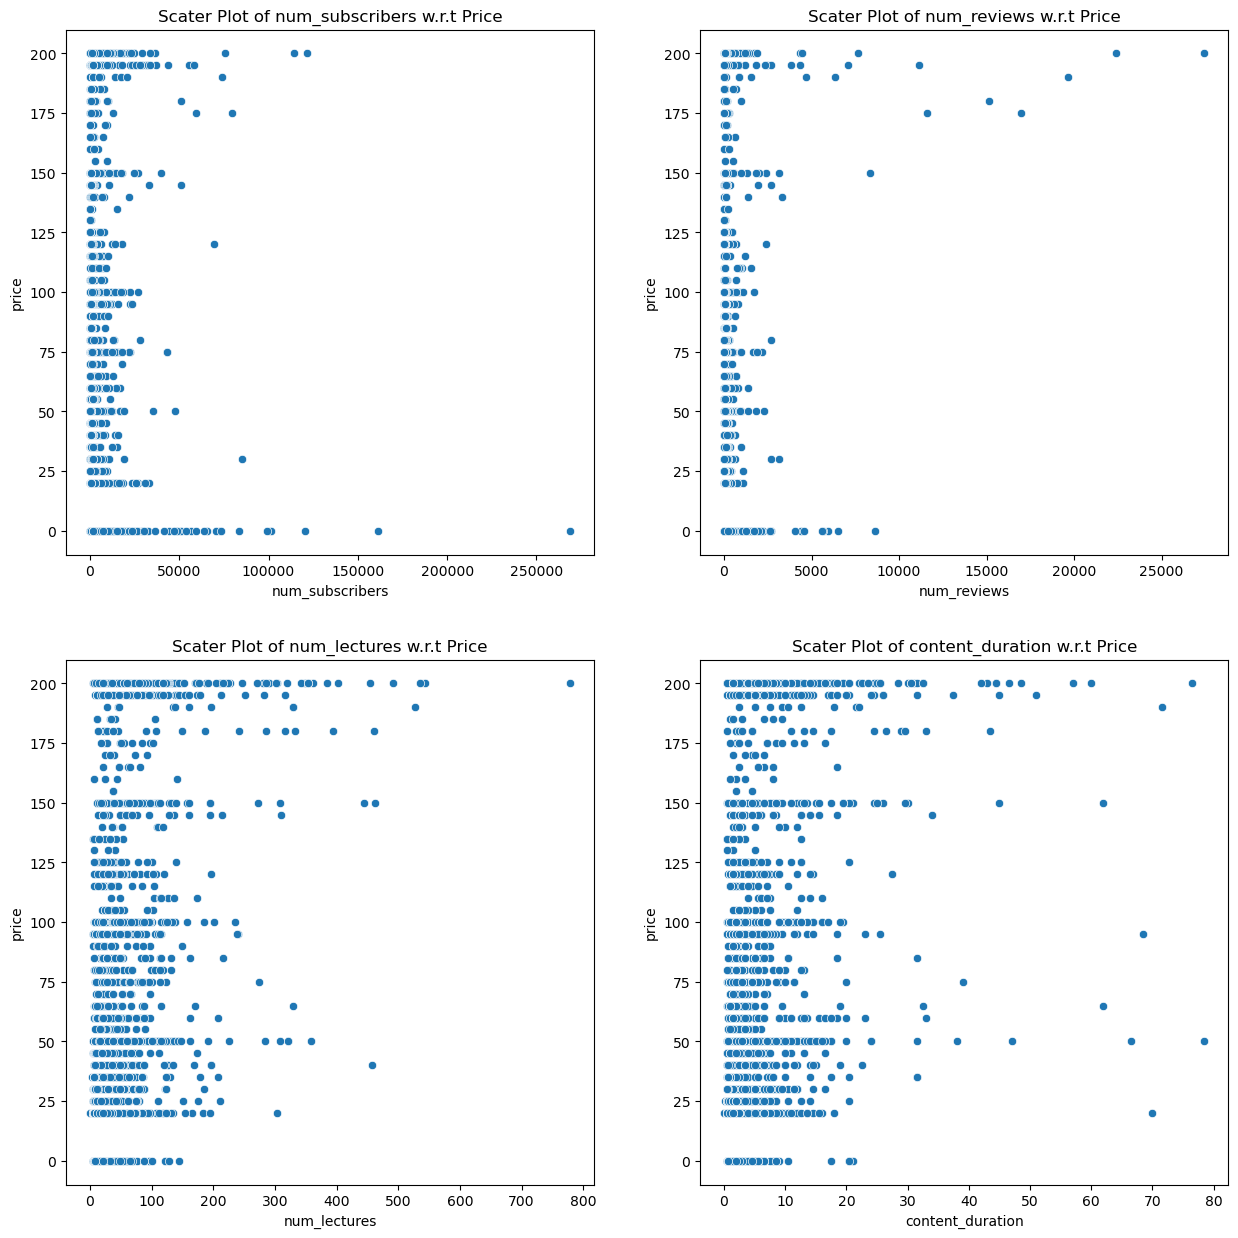

In [32]:
plt.figure(figsize=(15,15))
for i,c in enumerate(list(df.select_dtypes(include=['int64','float64']).columns[2:])):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[c],y=df['price'])
    plt.title("Scater Plot of {a} w.r.t Price".format(a=c))

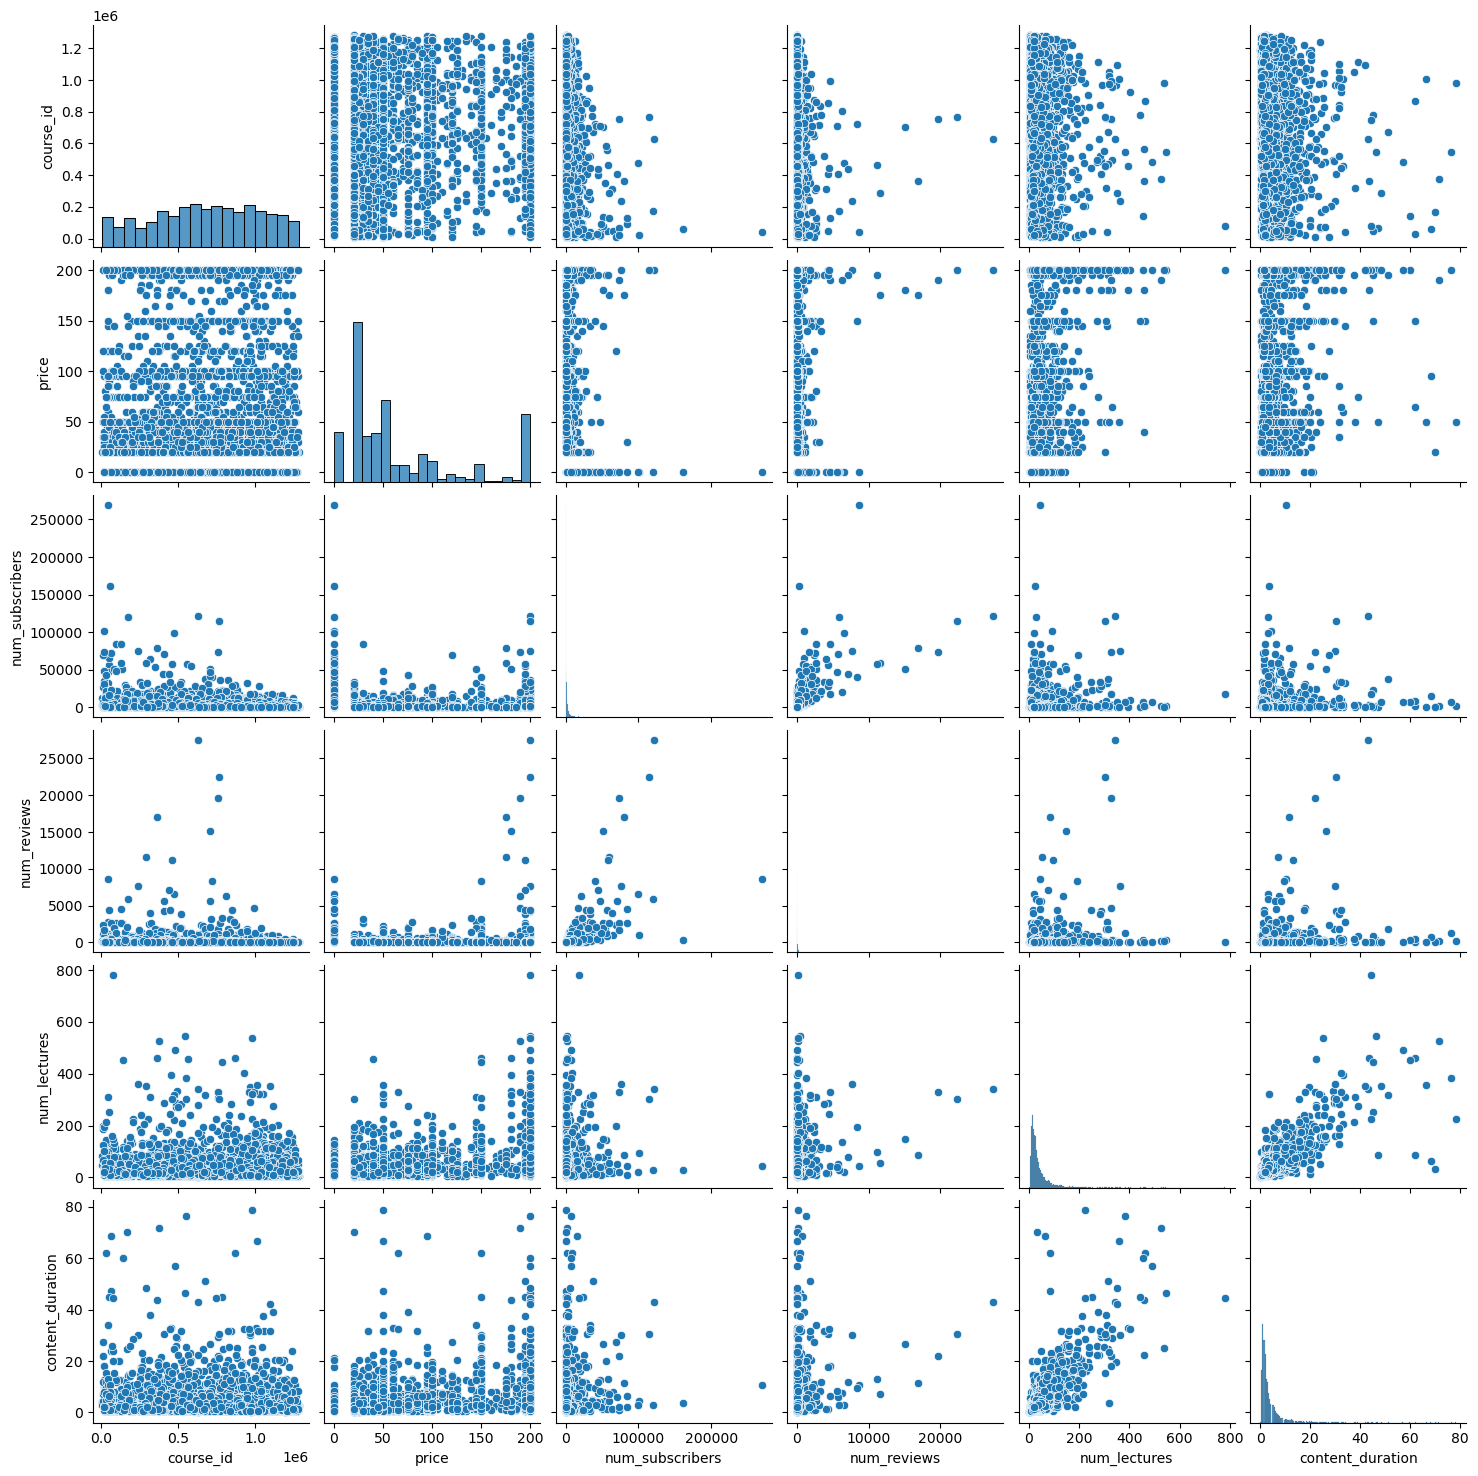

In [29]:
sns.pairplot(df)

### Corelation Matrix Heatmap

for checking Multi-collinearity

Text(0.5, 1.0, 'correcation Heat Map of Datafram')

<Figure size 1000x1000 with 0 Axes>

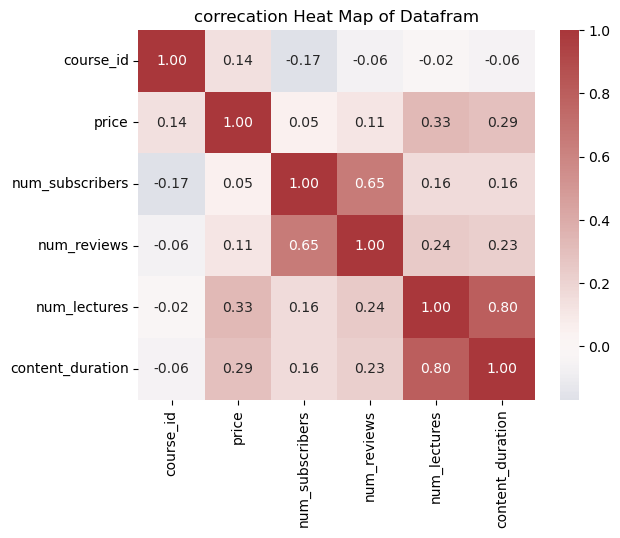

In [30]:
plt.figure(figsize=(10,10))
fig,ax=plt.subplots()
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap='vlag',center=0)
ax.set_title("correcation Heat Map of Datafram")

There is no strong correlation b/w input variables Except content_duration and num_lectures.

so we can drop one of them.

### Regression Plots


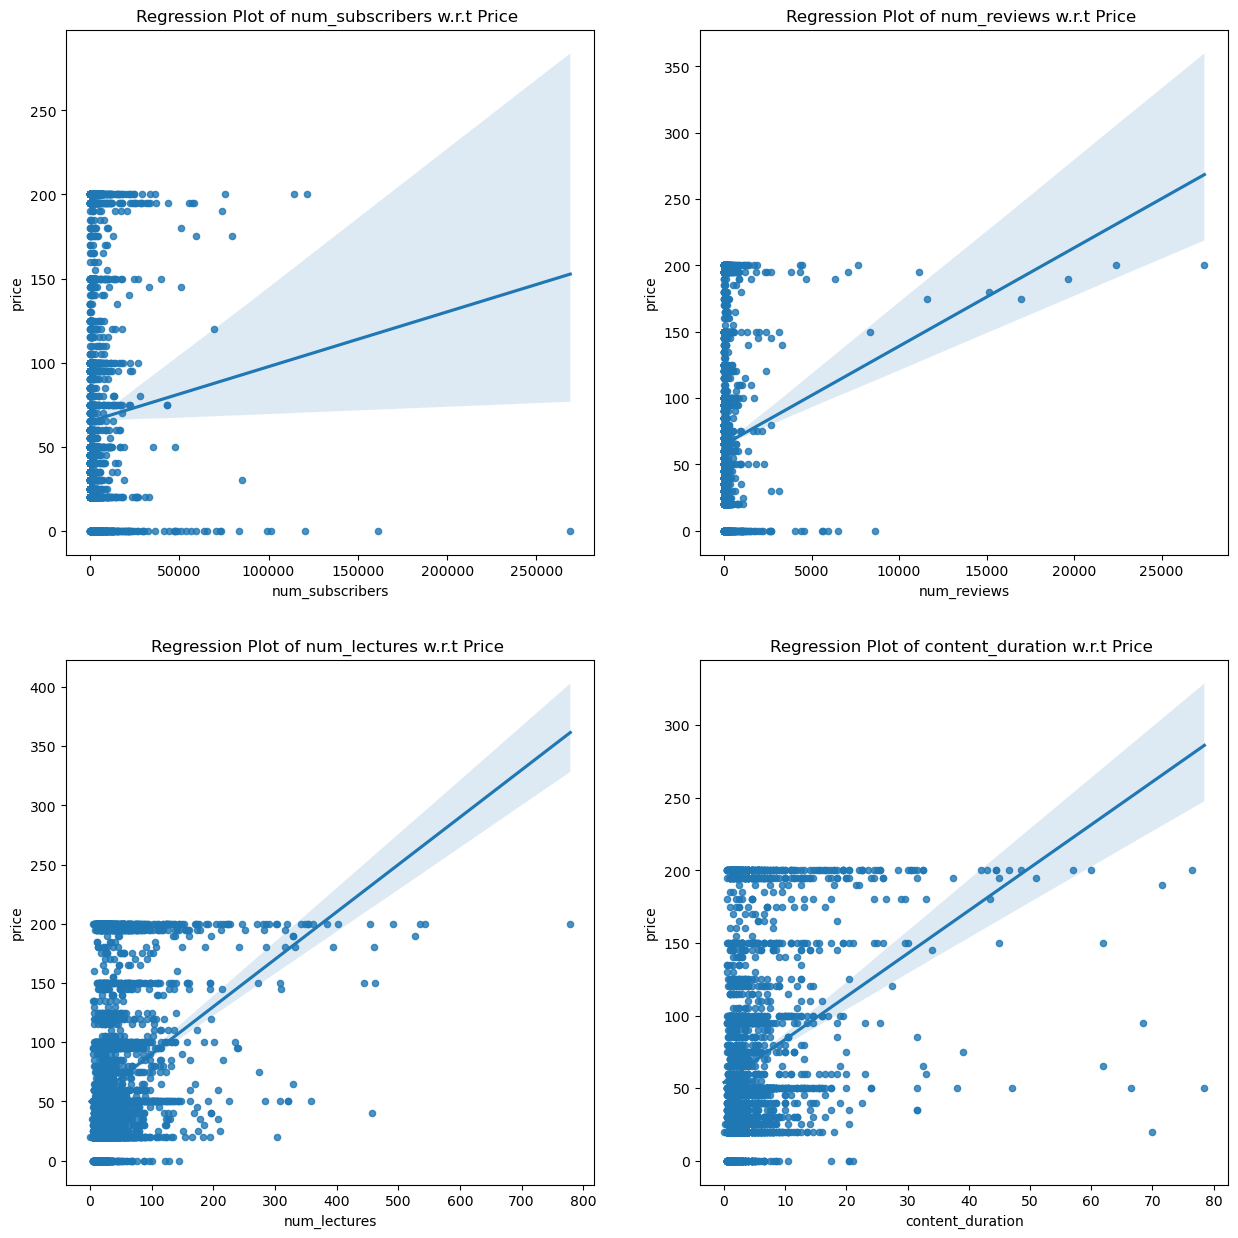

In [31]:
plt.figure(figsize=(15,15))
for i,c in enumerate(list(df.select_dtypes(include=['int64','float64']).columns[2:])):
    plt.subplot(2,2,i+1)
    sns.regplot(data=df, x=c, y="price", scatter_kws={"s":20})
    plt.title("Regression Plot of {a} w.r.t Price ".format(a=c))

From here, we can say that there is a positive correlation but not strongly correlated.

### Advanced Interactive Visualization 

In [33]:
import plotly.express as px
import plotly.graph_objects as go


In [39]:
fig = px.scatter(df, x="content_duration", y="price", color="price",
             hover_data=["num_lectures","num_subscribers","num_reviews"],
                 title="Total bill vs Tip (interactive)")
fig.update_layout(width=800, height=500)
fig.show()
# To save:
fig.write_html("interactive_scatter.html")


In [44]:
fig = px.bar(df, x="subject", y="num_subscribers", color="price",
             hover_data=["num_lectures","num_reviews"],
                 title="Total bill vs Tip (interactive)")
fig.update_layout(width=800, height=500)
fig.show()
# To save:
fig.write_html("interactive_bar.html")
